In [1]:
import json
import os
import re
import traceback

import datasets
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

In [2]:
data_dir = "./data"

In [3]:
unemployed = pd.read_csv(os.path.join(data_dir, "unemployment analysis.csv"))

In [4]:
unemployed

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,...,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,...,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,...,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,...,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,...,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,Samoa,WSM,2.10,2.38,2.63,3.04,3.19,3.47,3.90,4.18,...,8.75,8.67,8.72,8.50,8.31,8.58,8.69,8.41,9.15,9.84
231,"Yemen, Rep.",YEM,8.32,8.31,8.35,8.34,8.96,9.59,10.20,10.81,...,13.17,13.27,13.47,13.77,13.43,13.30,13.15,13.06,13.39,13.57
232,South Africa,ZAF,29.95,29.98,29.92,29.89,29.89,29.87,29.91,29.95,...,24.73,24.56,24.89,25.15,26.54,27.04,26.91,28.47,29.22,33.56
233,Zambia,ZMB,18.90,19.37,19.70,18.43,16.81,15.30,13.64,12.00,...,7.85,8.61,9.36,10.13,10.87,11.63,12.01,12.52,12.85,13.03


In [38]:
unemployed.dtypes

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
1991            float64
dtype: object

In [56]:
bins = 50

array([[<AxesSubplot: title={'center': '1991'}>]], dtype=object)

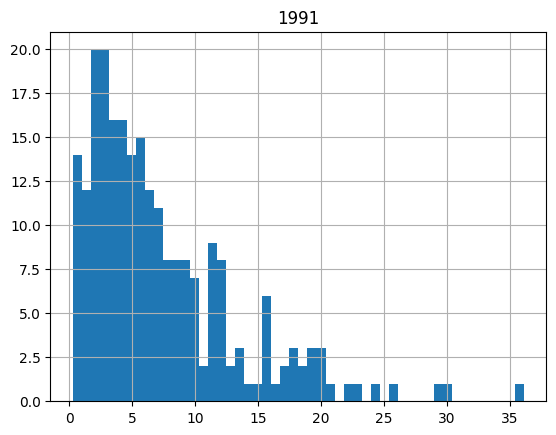

In [57]:
unemployed.hist(column = "1991", bins=bins)

array([[<AxesSubplot: title={'center': '2021'}>]], dtype=object)

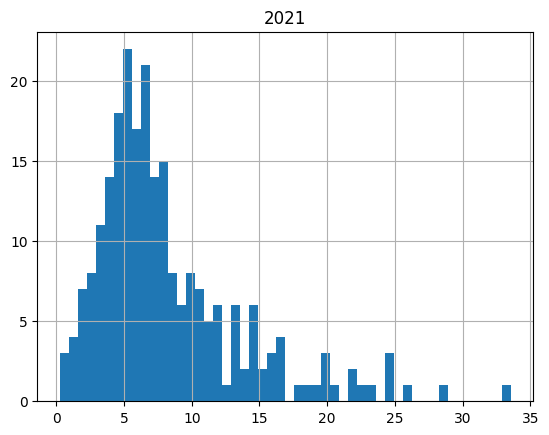

In [58]:
unemployed.hist(column = "2021", bins=bins)

In [ ]:
# plot column of 1991 and 2021
unemployed.plot(kind="hist",
        bins=bins,
        title=Histogramm
)